## Описание проекта 

По условию задачи мы работаем в интернет-магазине компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценках пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Мы имеем данные за 2016 год, нужно спланировать кампанию на 2017-й. 

### Описание данных

> - `Name` — название игры
> - `Platform` — платформа
> - `Year_of_Release` — год выпуска
> - `Genre` — жанр игры
> - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
> - `EU_sales` — продажи в Европе (миллионы проданных копий)
> - `JP_sales` — продажи в Японии (миллионы проданных копий)
> - `Other_sales` — продажи в других странах (миллионы проданных копий)
> - `Critic_Score` — оценка критиков (максимум 100)
> - `User_Score` — оценка пользователей (максимум 10)
> - `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Ход работы

В ходе нашей работы мы:  
1. Подготовим данные к анализу:  
    >* уберем пропуски, дубликаты;  
    >* проверим на корректность типов данных;  
    >* произведем необходимые дополнительные расчеты для дальнейшего анализа.  
1. Исследуем данные:  
    >* как распределяется выпуск игр по годам;  
    >* как распределяются продажи по платформам, жанрам игр;  
    >* оценим показатели по платформам и выделим из них наиболее перспективные на 2017-й год.  
1. Составим портрет пользователя, оценим распределение продаж по жанрам, платформам в зависимости от региона пользователя;  
1. Проведем статистический анализ различий оцениваемых жанров, платформ. 

## Импорт и ознакомление с данными

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib.pyplot import figure
pd.options.display.float_format = '{:.2f}'.format
sns.set_style("darkgrid")

In [2]:
games_df = pd.read_csv('games.csv')

In [3]:
display(games_df.head())
games_df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что стоит переименовать столбцы, так как они не соответствуют стилю.  
Есть пропуски в столбцах с оценками игр - наибольшее количество пропусков, также некоторое количество в годе выпуска, жанре и названии.  
Видно несоответствие данных и типов данных - например, год выпуска указан как вещественное число, а оценка от пользователей как строка. 

## Предобработка данных

### Переименование стоблцов

Чтобы данные были в корректном стиле, приведем названия столбцов к нижнему регистру. 

In [4]:
games_df.columns = games_df.columns.str.lower()

### Изменение типов данных

Также стоит сразу изменить типы данных в тех столбцах, где они не соответствуют значениям. 

В таблице неподходящие типы данных у столбцов `year_of_release` и `critic_score` - вещественный вместо целочисленного, `user_score` - строка, вместо вещественного числа.  
В столбцах `year_of_release` и `critic_score` несоответствие типам данных может быть вызвано наличием пропусков - они могут быть в формате `float`, поэтому и весь столбец принимает такой тип. Заменим их на `Int64`.  
В случае `user_score` ситуация непонятна. Проверим, какие значения есть в столбце. 

In [5]:
games_df.year_of_release = games_df.year_of_release.astype('Int64')

In [6]:
games_df.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Видим, что все значения целые, кроме встречающихся `nan`. 

In [7]:
games_df.critic_score = games_df.critic_score.astype('Int64')

In [8]:
games_df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце с рейтингом от пользователей помимо пропусков также встречаются значения `tbd`. Это аббревиатура в дословном переводе означает "на уточнении", и в нашей ситуации равносильно пропуску. В этом случае можем заменить значения `tbd` на `nan`, а столбец перевести в формат `float64`. 

In [9]:
games_df.loc[games_df['user_score']=='tbd', 'user_score'] = float('nan')

In [10]:
games_df.user_score = games_df.user_score.astype('float64')

In [11]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Типы данных привели к нужным значениям. 

### Пропуски 

По таблице `info()` мы видим, что пропуски есть 6 столбцах из 10.  
Меньше всего пропусков, по 2, в имени и жанре игры. Стоит проверить, соответствуют ли 2 пропуска в жанре двум пропускам в названии игр. Если это так, то данные строки можно удалить. Относительно размера всей выборки мы не потеряем значительного количества информации. 

In [12]:
games_df[games_df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Действительно, по данным играм нет ни названия, ни жанра, ни рейтингов. Удаляем. 

In [13]:
games_df = games_df.dropna(subset=['name']).copy()

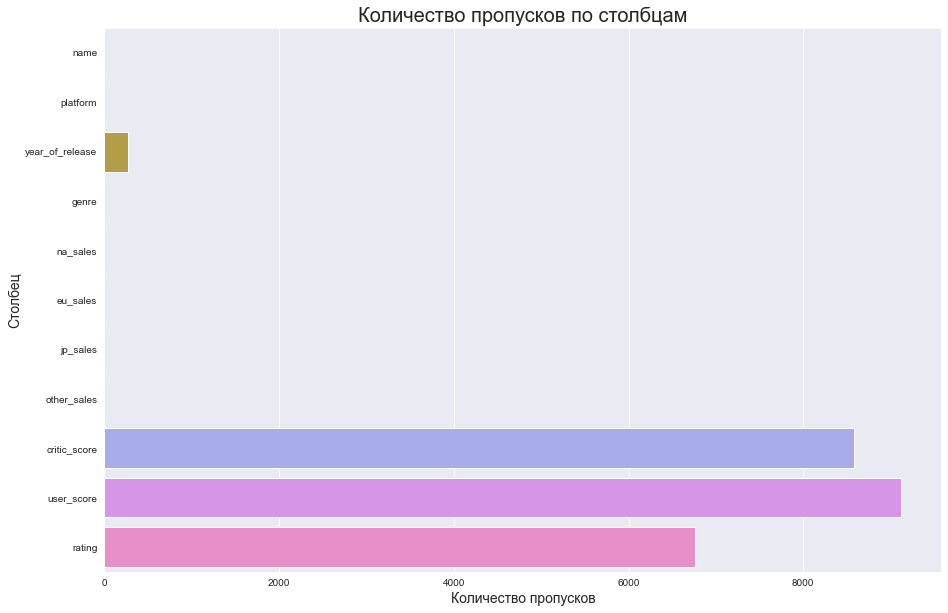

In [14]:
plt.figure(figsize=(15,10))

sns.barplot(x=games_df.isna().sum(), y=games_df.columns, orient='h')
    
plt.title('Количество пропусков по столбцам', fontsize=20)
plt.xlabel('Количество пропусков', fontsize=14)
plt.ylabel('Столбец', fontsize=14)

plt.show();

Остались пропуски в годе выхода игры и в рейтингах. Ознакомимся с пропусками в `year_of_release`.

In [15]:
df_year = games_df[games_df['year_of_release'].isna() == True]
display(df_year.head(10))
df_year.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.50,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.40,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.90,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92,8.20,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78,6.60,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69,6.70,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80,6.30,T


<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 183 to 16522
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             269 non-null    object 
 1   platform         269 non-null    object 
 2   year_of_release  0 non-null      Int64  
 3   genre            269 non-null    object 
 4   na_sales         269 non-null    float64
 5   eu_sales         269 non-null    float64
 6   jp_sales         269 non-null    float64
 7   other_sales      269 non-null    float64
 8   critic_score     154 non-null    Int64  
 9   user_score       127 non-null    float64
 10  rating           181 non-null    object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 25.7+ KB


In [16]:
# доля пропусков в столбце

games_df[games_df['year_of_release'].isna() == True]['name'].count()/games_df['name'].count()

0.016095255190570215

Видно, что помимо пропущенного года выхода игры есть пропуски в столбцах рейтингов. Пропуски рейтингов есть более чем в сотне строк, половина этого маленького датасета. И эти строки получаются практически неинформативными. Учитывая, что доля строк с пропусками относительно всего массива данных невелика, 1.6 %, можем их удалить. 

In [17]:
games_df = games_df.dropna(subset=['year_of_release']).copy()

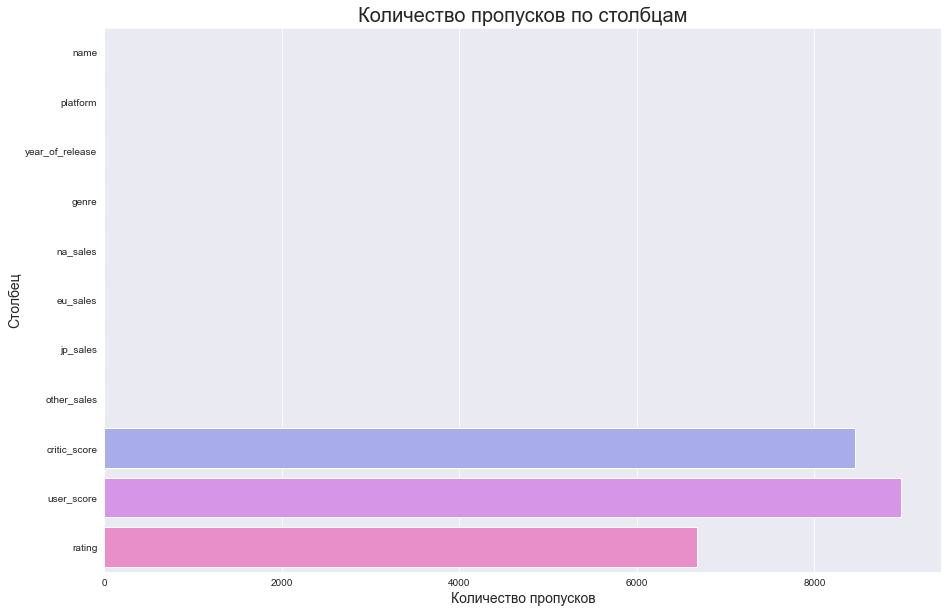

In [18]:
plt.figure(figsize=(15,10))

sns.barplot(x=games_df.isna().sum(), y=games_df.columns, orient='h')
    
plt.title('Количество пропусков по столбцам', fontsize=20)
plt.xlabel('Количество пропусков', fontsize=14)
plt.ylabel('Столбец', fontsize=14)

plt.show();

Также следует обратить внимание на пропуске в столбце `rating`. Значения в нем отображают рейтинг игры от агенства ESRB. Этот рейтинг присваивается играм и прочему развлекательному контенту в США и Канаде.  
Отсюда следует, если игра продается в других странах, такого рейтинга у нее не будет.  

Проверим, какую долю от данных занимают пропуски. 

In [19]:
games_df[games_df['rating'].isna() == True]['name'].count()/games_df['name'].count()

0.40598394551204087

Пропусков более 40%. Это очень много. С наибольшей вероятностью, это как раз из-за региона. На данном этапе поставим вместо пропусков заглушку, `NA`.

In [20]:
games_df['rating'] = games_df['rating'].fillna('NA')

По остальным пропускам, то есть `critic_score` и `user_score` информацию добавить мы не сможем. Вероятно, по указанными играм просто нет оценок. Оставим как есть. 

### Дубликаты

Также проверим, есть ли в наших данных дубликаты. 

In [21]:
games_df.duplicated().sum()

0

Дубликатов в данных нет. Отлично, двигаемся далее. 

### Дополнительные вычисления

Для дальнейшего анализа будет полезно иметь представление о том, насколько хорошо игра продавалась по всему миру, а не только по регионам. Добавим столбец с суммарными продажами.

In [22]:
games_df['total_sales'] = games_df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NA,31.38


## Исследовательский анализ

### Распределение игр по годам выпуска

Для начала проверим, сколько игр выпускалось в разные годы. Построим график, для наглядности. 

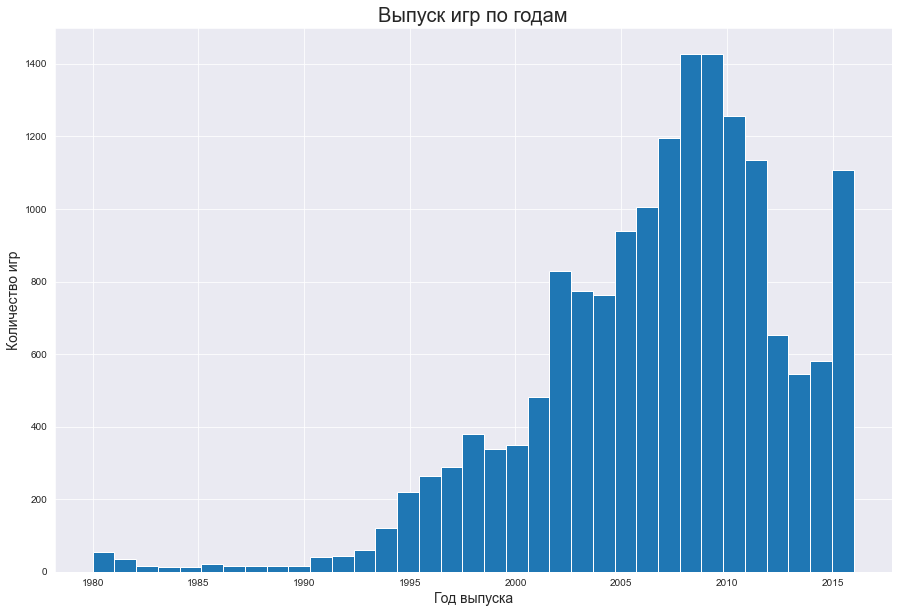

In [24]:
figure(figsize=(15, 10))

games_df['year_of_release'].hist(bins=35)

plt.title('Выпуск игр по годам', fontsize=20)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)

plt.show();

По этому распределению видно, что до 1995 года новые игры выходили крайне редко. Показатели, сопоставимые с 2016 годом появились только после 2000 года. 

### Продажи по платформам

Теперь рассмотрим, как распределяются продажи по различным платформам, на которые выпускаются игры. Для этого сгруппируем данные по платформам и оценим общие продажи. 

In [25]:
(
    games_df.groupby('platform')
    .agg(total_sales=('total_sales', 'sum'))
    .sort_values('total_sales', ascending=False)
    .reset_index().copy()
)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Видим, что за исследуемый период, с 1985 по 2016 годы, наибольшие продажи были по играм для PS2.  
Проверим, как распределяются продажи по годам для наиболее успешных (в нашей выборке) платформ. Для этого отберем 5 первых из таблицы выше и построим по ним графики.

In [26]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

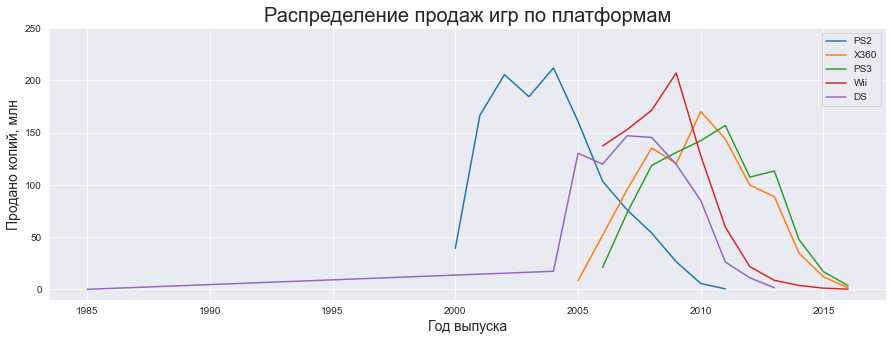

In [27]:
for i in platforms:
    (
      games_df.query('platform == @i')
      .groupby('year_of_release')['total_sales'].sum()
      .plot(ylim=(-10, 250), label=i, legend=True, 
            figsize=(15,5))
      )
    plt.title('Распределение продаж игр по платформам', fontsize=20)
    plt.xlabel('Год выпуска', fontsize=14)
    plt.ylabel('Продано копий, млн', fontsize=14)
    
plt.show;

По графику видим, что у лидеров распределение в среднем на 10 лет, от взлета до падения. Распределение у графиков по большей части нормальное. Из этого можно сделать вывод, что платформа равномерно как развивается, так и затухает. Пик приходится на середину десятилетнего отрезка. 
 
Также можно заметить странное распределение по платформе DS. Дело в том, что сама платформа выпущена только в 2004 году. Вероятно, она ошибочно указана у одной из старых игр, отчего идет такое искажение графика. 

### Формирование выборки по актуальному периоду

Так как нам нужно построить прогноз на 2017 год, и исходя из полученных данных будет формироваться рекламная кампания, то необходимо выбрать период, пик которого будет приходиться как раз на 2017 год. Это нам поможет выбрать наиболее перспективные платформы для продвижения.  

Как мы выяснили в предыдущем блоке, срок жизни платформы в среднем 10 лет с наилучшими результатами в середине этого периода. Однако учитывая специфику индустрии видео игр, которая развивается очень динамично, имеет смысл взять более узкий промежуток времени. Ограничимся данными начиная с 2013 года. 

In [28]:
games_act = games_df.loc[games_df['year_of_release']>= 2013].copy()
display(games_act.head())
games_act.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NA,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NA,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 231.2+ KB


#### Распределение выручки по годам. Определение потенциально прибыльных платформ

In [29]:
(
    games_act.groupby('platform')
    .agg(total_sales=('total_sales', 'sum'))
    .sort_values('total_sales', ascending=False)
    .reset_index().copy()
)


,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


Из 31 платформы по общей выборке у нас осталось только 11.  

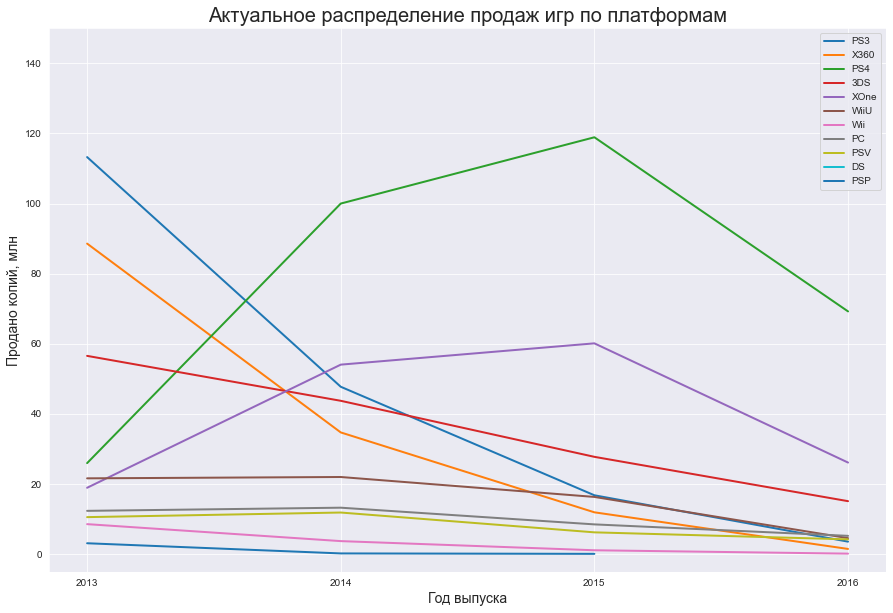

In [30]:

platforms = games_act['platform'].unique()

for i in platforms:
    ax = (
      games_act.query('platform == @i')
        .groupby('year_of_release')['total_sales'].sum()
        .plot(ylim=(-5, 150), label=i, legend=True, 
            figsize=(15, 10), linewidth=2)
      )
    plt.title('Актуальное распределение продаж игр по платформам', fontsize=20)
    plt.xlabel('Год выпуска', fontsize=14)
    plt.ylabel('Продано копий, млн', fontsize=14)
    plt.xticks([2013, 2014, 2015, 2016])
        
plt.show;

Видим двух явных лидеров - PS4 и XOne. Они появились в 2013 году и только набирают популярность. Остальные показывают существенно более скромные результаты, находясь примерно в одинаковом состоянии, и постепенно теряя продажи. 

Можно заметить, что на графике есть резкое падение в 2016 году. Это может быть связано с тем, что данные за 2016 год у нас неполные.  

Учитывая, что  топовые платформы живут в среднем 10 лет, можем предположить, что будущие топы - это PS4 и XOne.

#### Распределение глобальных продаж по платформам

Чтобы ознакомиться с распределением продаж по платформам построим диаграмму размаха и рассмотрим, что у нас получилось. 

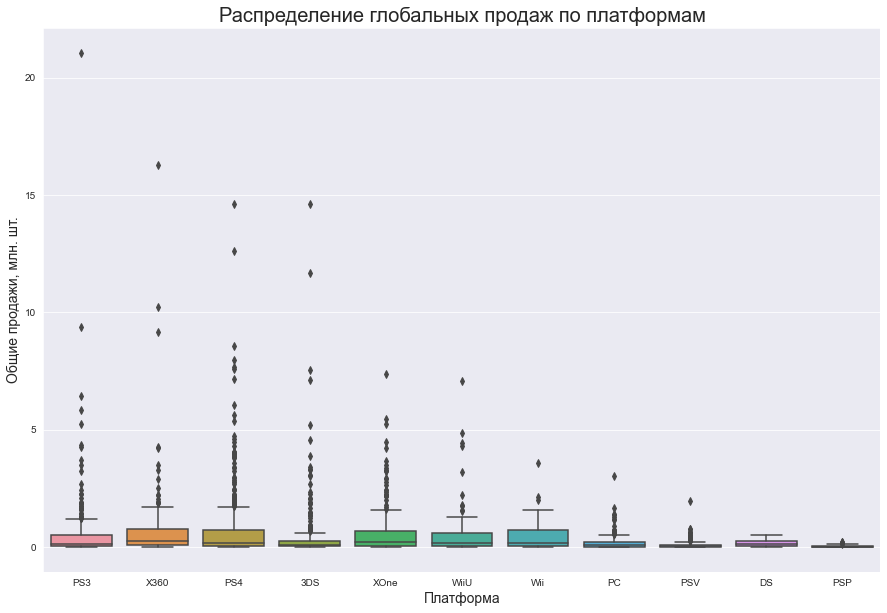

In [31]:
figure(figsize=(15,10))

sns.boxplot(data=games_act, y='total_sales', x='platform')

plt.title('Распределение глобальных продаж по платформам', fontsize=20)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Общие продажи, млн. шт.', fontsize=14);

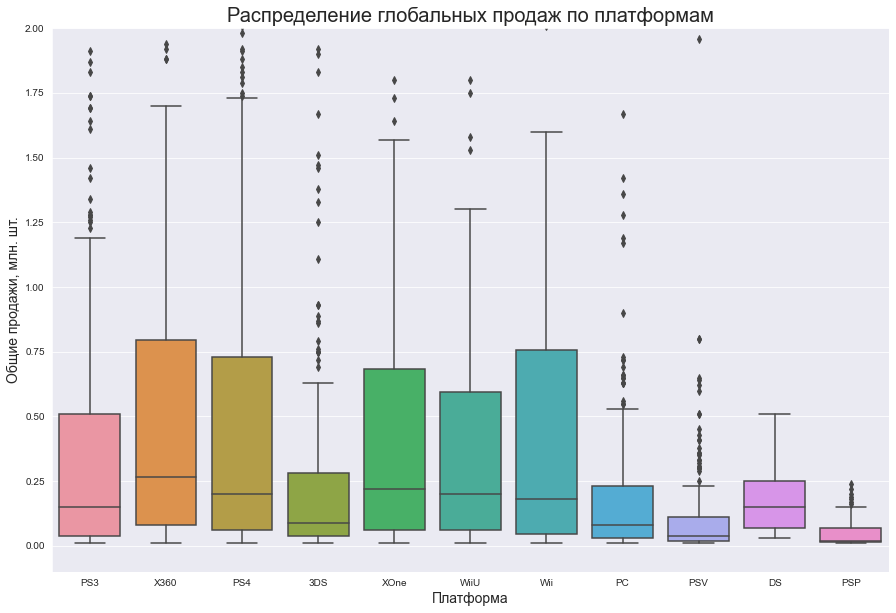

In [32]:
figure(figsize=(15, 10))

sns.boxplot(data=games_act, y='total_sales',x='platform')

plt.title('Распределение глобальных продаж по платформам', fontsize=20)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Общие продажи, млн. шт.', fontsize=14)
plt.ylim(-0.1,2);

По графикам видим, что для всех платформ медиана смещена ближе к первому квартилю, то есть распределения скошены вправо. Также по всем платформам есть выбросы - игры с выдающимися продажами.  

На увеличенном графике можем сравнить перспективные платформы, PS4 и XOne. Видим, что распределение по второй платформе более компактное - межквартильный размах немного меньше. Также можем заметить, что медианное значение глобальных продаж на XOne немного больше, чем на PS4. Это говорит о том, что на PS4 больше игр, которые имеют выдающиеся глобальные продажи, соответственно, пользователи этой платформы тратят больше денег.  

Среди всех платформ из нашего обновленного датасета самая высокая медиана продаж у X360. Платформа в свои лучшие годы была очень популярна, и за время жизни накопила большое количество пользователей. Она на момент сбора данных на спаде, рост не предвидится, поэтому среди перспективных платформ рассматриваться не будет. Однако, данные по этой платформе могут иметь важное значение в выборе жанра игр. 

#### Зависимость продаж от оценок критиков и пользователей

Теперь рассмотрим, есть ли корреляция между оценками игр и их продажами. Для этого сгруппируем данные по рейтингу, выделив медианные показатели глобальных продаж, и построим диаграмму рассеяния.  

В данном случае берем медиану, потому что слишком хорошие показатели одной отдельно взятой игры могут исказить показатели, а медиана менее подвержена этой корректировке. 

Изначально проверим данные по одной из платформ-лидеров, PS4.

In [33]:
games_ps4 = games_act[games_act['platform']=='PS4'].copy()

In [34]:
games_ps4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.00,-0.25,-0.21,-0.06,-0.23,-0.02,0.15,-0.24
na_sales,-0.25,1.00,0.79,0.47,0.94,0.42,-0.02,0.93
eu_sales,-0.21,0.79,1.00,0.46,0.94,0.35,-0.05,0.96
jp_sales,-0.06,0.47,0.46,1.00,0.50,0.32,0.17,0.53
other_sales,-0.23,0.94,0.94,0.50,1.00,0.41,-0.04,1.00
critic_score,-0.02,0.42,0.35,0.32,0.41,1.00,0.56,0.41
user_score,0.15,-0.02,-0.05,0.17,-0.04,0.56,1.00,-0.03
total_sales,-0.24,0.93,0.96,0.53,1.00,0.41,-0.03,1.00


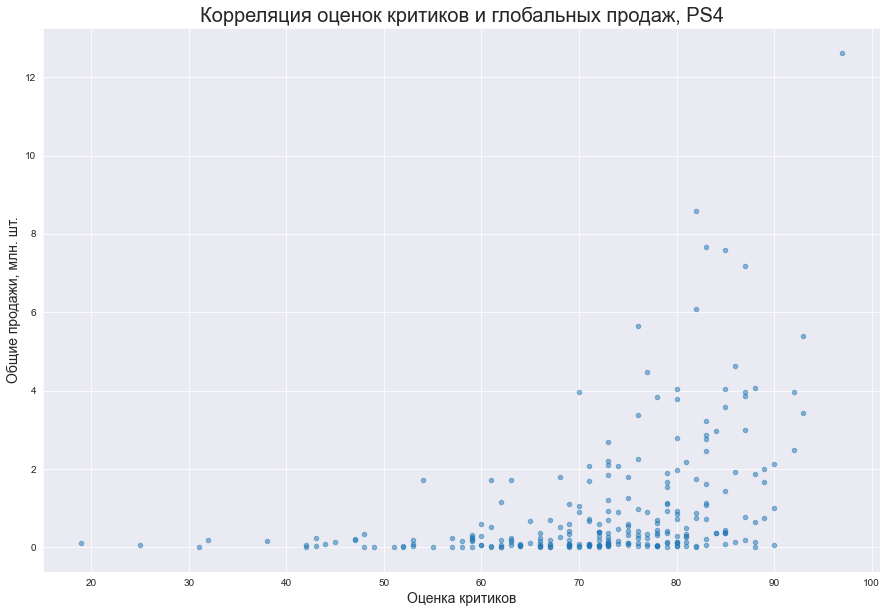

In [35]:
games_ps4.plot(kind='scatter', figsize=(15,10), 
              x='critic_score', y='total_sales', alpha=0.5)

plt.title('Корреляция оценок критиков и глобальных продаж, PS4', fontsize=20)
plt.xlabel('Оценка критиков', fontsize=14)
plt.ylabel('Общие продажи, млн. шт.', fontsize=14);

Заметна сильная прямая корреляция между оценками критиков и общими продажами. После 60 баллов видно, что в верхней части графика серьезно увеличивается концентрация точек.   
В целом по датасету она составляет 0.41, что является ощутимым показателем. 

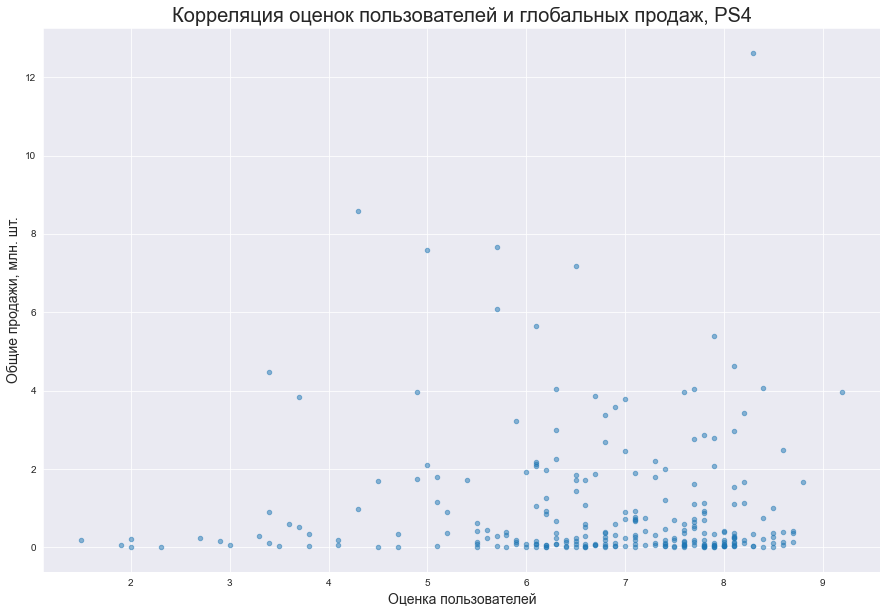

In [36]:
games_ps4.plot(kind='scatter', figsize=(15,10), 
              x='user_score', y='total_sales', alpha=0.5)

plt.title('Корреляция оценок пользователей и глобальных продаж, PS4', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.ylabel('Общие продажи, млн. шт.', fontsize=14);

В случае с оценками пользователей видим, что заметной корреляции нет. Значения распределены хаотично. Можем лишь заметить, что игр с более высокой оценкой больше, чем с более низкой. 

Сравним эти показатели с данными по другим платформам в нашем датасете. Выберем 6 разных и построим по ним графики. 

In [37]:
platforms = ["3DS", "XOne", "PC", "WiiU", "X360", "PSV"]

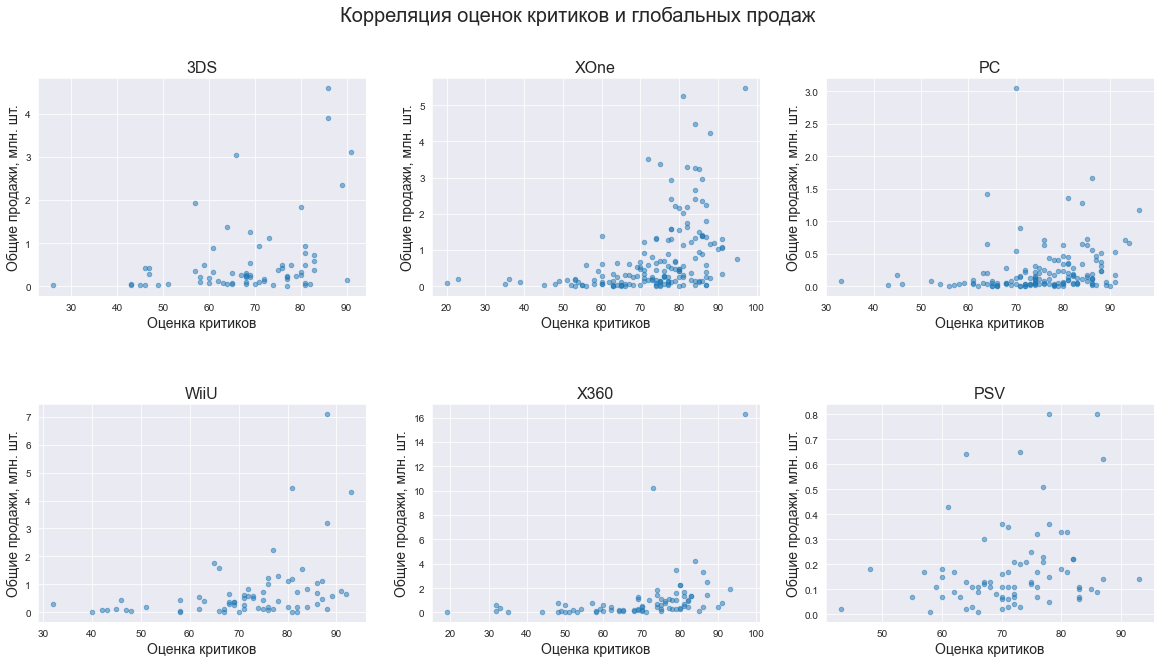

In [38]:
figure(figsize=(20, 10))
plt.suptitle("Корреляция оценок критиков и глобальных продаж", fontsize=20)
plt.subplots_adjust(hspace=0.5)

for i, plfm in enumerate(platforms):
    ax = plt.subplot(2, 3, i+1)
    (
        games_act[games_act['platform']==plfm]
        .plot(ax=ax, x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
    )
    plt.title(plfm, fontsize=16)
    plt.xlabel('Оценка критиков', fontsize=14)
    plt.ylabel('Общие продажи, млн. шт.', fontsize=14)
    

plt.show()


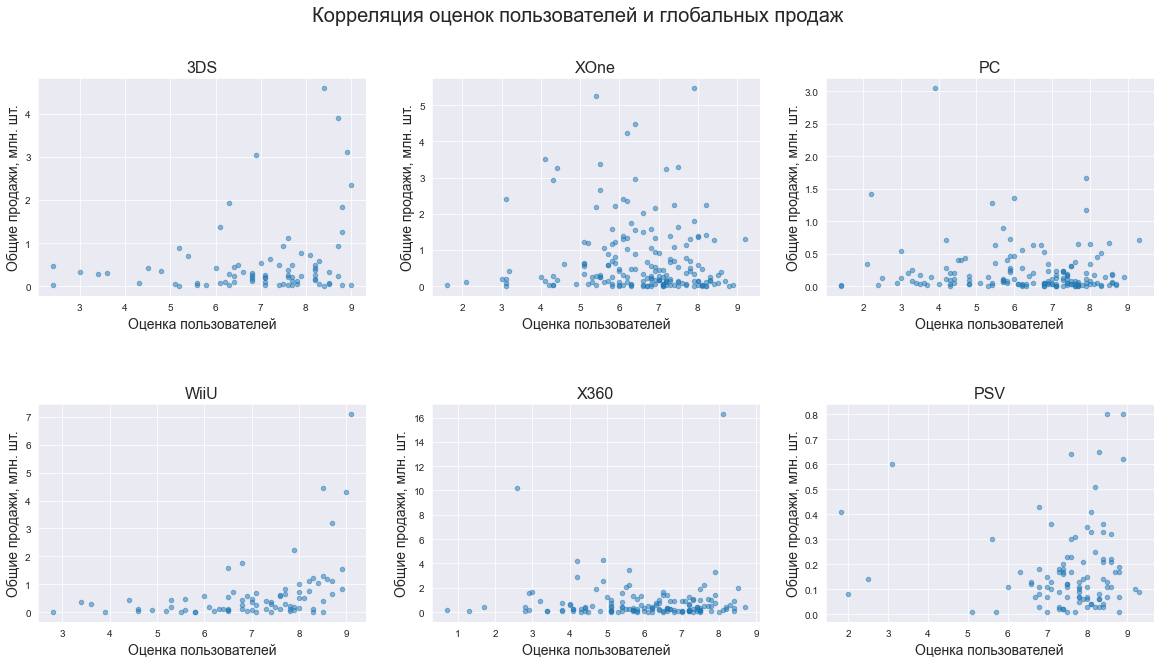

In [39]:
figure(figsize=(20, 10))
plt.suptitle("Корреляция оценок пользователей и глобальных продаж", fontsize=20)
plt.subplots_adjust(hspace=0.5)

for i, plfm in enumerate(platforms):
    ax = plt.subplot(2, 3, i+1)
    (
        games_act[games_act['platform']==plfm]
        .plot(ax=ax, x='user_score', y='total_sales', kind='scatter', alpha=0.5)
    )
    plt.title(plfm, fontsize=16)
    plt.xlabel('Оценка пользователей', fontsize=14)
    plt.ylabel('Общие продажи, млн. шт.', fontsize=14)
    

plt.show()


Как видим, тенденция, замеченная на PS4, сохраняется и для других платформ:
> Зависимость продаж от оценки критиков проявляется только после 60 баллов;  
> Явной зависимости продаж от оценки пользователей не наблюдается. 

### Распределение по жанрам

Проверим, как распределяются игры по жанрам. 

In [40]:
games_genres = (
    games_act.groupby('genre')['total_sales']
    .agg(['count', 'median'])
    .sort_values('median', ascending=False).reset_index()
)
games_genres

,genre,count,median
0,Shooter,187,0.45
1,Sports,214,0.24
2,Platform,74,0.22
3,Role-Playing,292,0.12
4,Fighting,80,0.12
5,Racing,85,0.12
6,Action,766,0.11
7,Simulation,62,0.10
8,Misc,155,0.10
9,Strategy,56,0.08


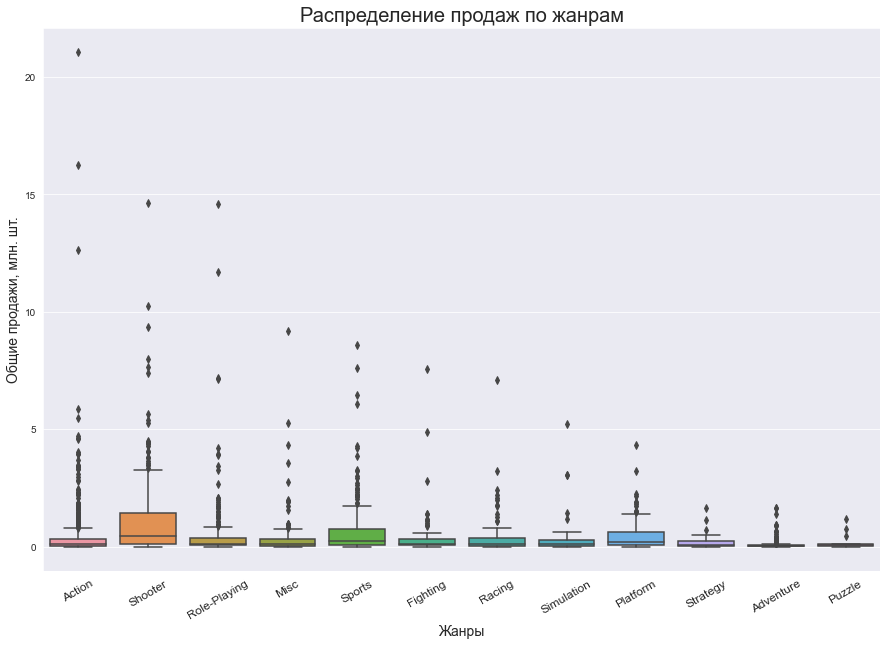

In [41]:
figure(figsize=(15, 10))

sns.boxplot(data=games_act, x='genre', y='total_sales')

plt.xticks(rotation=30, fontsize=12)
plt.title('Распределение продаж по жанрам', fontsize=20)
plt.xlabel('Жанры', fontsize=14)
plt.ylabel('Общие продажи, млн. шт.', fontsize=14);

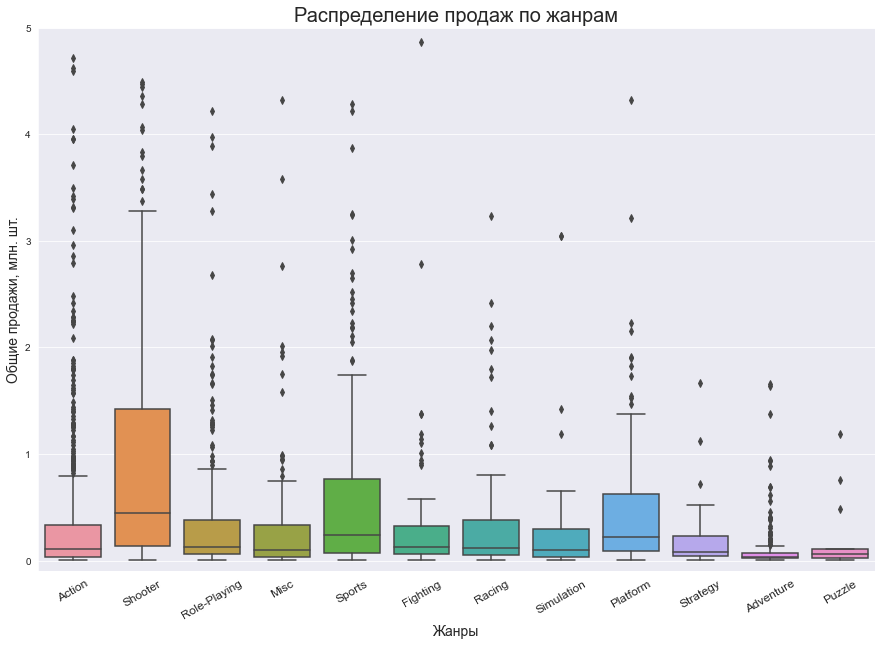

In [42]:
figure(figsize=(15, 10))

sns.boxplot(data=games_act, x='genre', y='total_sales')

plt.xticks(rotation=30, fontsize=12)
plt.title('Распределение продаж по жанрам', fontsize=20)
plt.xlabel('Жанры', fontsize=14)
plt.ylabel('Общие продажи, млн. шт.', fontsize=14)
plt.ylim(-0.1,5);

Из этой таблицы и графиков видим, что самый популярные жанры, лидеры по продажам, это шутеры, платформеры и спортивные.  
Однако лидерами по количеству выпущенных игр они не являются. Тут на три головы выше всех Экшены.  

Меньше всего продаются паззлы и приключения. 

## Отличие пользователей по регионам

Теперь время разобраться, как отличается пользовательское поведение в зависимости от региона.  
Рассмотрим, как распределяются наиболее популярные платформы и жанры игр по регионам. Также проверим, есть корреляция между рейтингом ESRB и продажами в регионах. 

### Распределение платформ по регионам

In [43]:
# Сгруппируем данные о продажах по регионам

na_platform = (
    games_act.groupby('platform')[['na_sales']]
     .agg('mean').reset_index()
     .sort_values('na_sales', ascending=False)
 )
na_platform['ratio'] = na_platform['na_sales'] / na_platform['na_sales'].sum()
na_platform.loc[na_platform['ratio']<0.1, 'platform'] = 'Other'
na_platform = (
    na_platform.groupby('platform')
    .sum().reset_index().sort_values('na_sales', ascending=False)
)

In [44]:
eu_platform = (
    games_act.groupby('platform')[['eu_sales']]
     .agg('mean').reset_index()
     .sort_values('eu_sales', ascending=False)
 )
eu_platform['ratio'] = eu_platform['eu_sales'] / eu_platform['eu_sales'].sum()
eu_platform.loc[eu_platform['ratio']<0.1, 'platform'] = 'Other'
eu_platform = (
    eu_platform.groupby('platform')
    .sum().reset_index().sort_values('eu_sales', ascending=False)
)

In [45]:
jp_platform = (
    games_act.groupby('platform')[['jp_sales']]
     .agg('mean').reset_index()
     .sort_values('jp_sales', ascending=False)
 )
jp_platform['ratio'] = jp_platform['jp_sales'] / jp_platform['jp_sales'].sum()
jp_platform.loc[jp_platform['ratio']<0.09, 'platform'] = 'Other'
jp_platform = (
    jp_platform.groupby('platform')
    .sum().reset_index().sort_values('jp_sales', ascending=False)
)

In [46]:
display(na_platform)
print()
display(eu_platform)
print()
display(jp_platform)

,platform,na_sales,ratio
0,Other,0.45,0.22
4,X360,0.44,0.21
5,XOne,0.38,0.18
2,Wii,0.29,0.14
1,PS4,0.28,0.13
3,WiiU,0.25,0.12


,platform,eu_sales,ratio
0,Other,0.53,0.30
2,PS4,0.36,0.20
3,Wii,0.26,0.14
4,X360,0.23,0.13
5,XOne,0.21,0.12
1,PS3,0.20,0.11


,platform,jp_sales,ratio
0,3DS,0.22,0.42
5,WiiU,0.09,0.18
2,PS3,0.07,0.13
4,PSV,0.05,0.10
3,PSP,0.05,0.09
1,Other,0.05,0.09


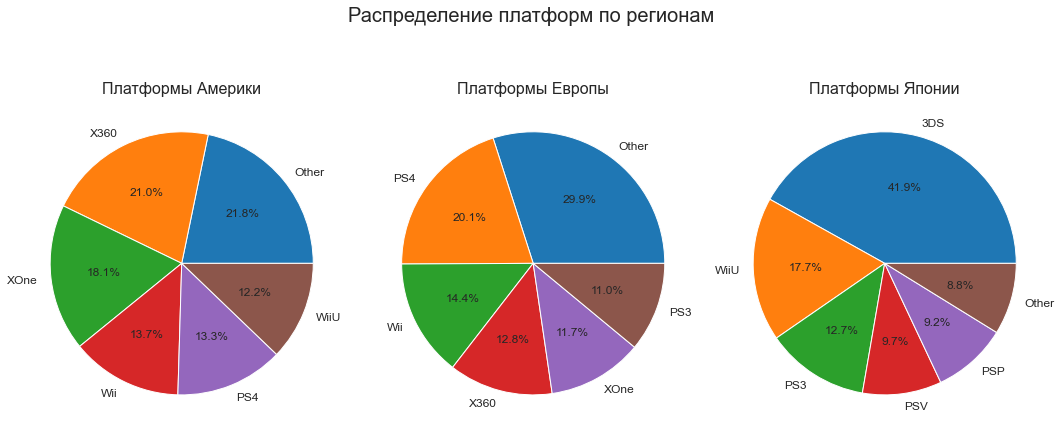

In [47]:
# Представим данные наглядно

figure(figsize=(15, 7))
plt.suptitle("Распределение платформ по регионам", fontsize=20)

plt.subplot(1, 3, 1)
plt.pie(na_platform['ratio'], labels=na_platform['platform'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Платформы Америки', fontsize=16)

plt.subplot(1, 3, 2)
plt.pie(eu_platform['ratio'], labels=eu_platform['platform'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Платформы Европы', fontsize=16)

plt.subplot(1, 3, 3)
plt.pie(jp_platform['ratio'], labels=jp_platform['platform'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Платформы Японии', fontsize=16)

plt.tight_layout()

plt.show()

Распределение платформ следующее:
> - В Северной Америке лидер X360, чуть позади Xone, PS4 и Wii. Большую долю рынка занимают остальные платформы. 
> - В Европе ситуация обратная, лидирует приставка от Сони, Wii на втором месте, XBox One и 360 идут следом. Что в Америке, что в Европе предпочтение отдают стационарным консолям. 
> - В Японии ситуация меняется. Там лидируют портативные консоли, 3DS (с огромным отрывом), WiiU. Первая из стационарных - PS3. 


### Распределение жанров по регионам

In [48]:
# Сгруппируем данные о продажах по жанрам

na_genres = (
    games_act.groupby('genre')['na_sales']
     .agg('mean').reset_index()
     .sort_values('na_sales', ascending=False)
 )
na_genres['ratio'] = na_genres['na_sales'] / na_genres['na_sales'].sum()
na_genres.loc[na_genres['ratio']<0.1, 'genre'] = 'Other'
na_genres = (
    na_genres.groupby('genre')
    .sum().reset_index().sort_values('na_sales', ascending=False)
)

In [49]:
eu_genres = (
    games_act.groupby('genre')['eu_sales']
     .agg('mean').reset_index()
     .sort_values('eu_sales', ascending=False)
 )
eu_genres['ratio'] = eu_genres['eu_sales'] / eu_genres['eu_sales'].sum()
eu_genres.loc[eu_genres['ratio']<0.1, 'genre'] = 'Other'
eu_genres = (
    eu_genres.groupby('genre')
    .sum().reset_index().sort_values('eu_sales', ascending=False)
)

In [50]:
jp_genres = (
    games_act.groupby('genre')['jp_sales']
     .agg('mean').reset_index()
     .sort_values('jp_sales', ascending=False)
 )
jp_genres['ratio'] = jp_genres['jp_sales'] / jp_genres['jp_sales'].sum()
jp_genres.loc[jp_genres['ratio']<0.09, 'genre'] = 'Other'
jp_genres = (
    jp_genres.groupby('genre')
    .sum().reset_index().sort_values('jp_sales', ascending=False)
)

In [51]:
display(na_genres)
print()
display(eu_genres)
print()
display(jp_genres)

,genre,na_sales,ratio
0,Other,1.06,0.48
2,Shooter,0.59,0.27
3,Sports,0.30,0.14
1,Platform,0.25,0.11


,genre,eu_sales,ratio
0,Other,0.86,0.42
3,Shooter,0.47,0.23
4,Sports,0.28,0.14
2,Racing,0.24,0.12
1,Platform,0.21,0.10


,genre,jp_sales,ratio
1,Other,0.32,0.44
3,Role-Playing,0.17,0.24
0,Fighting,0.10,0.13
4,Simulation,0.07,0.10
2,Puzzle,0.07,0.09


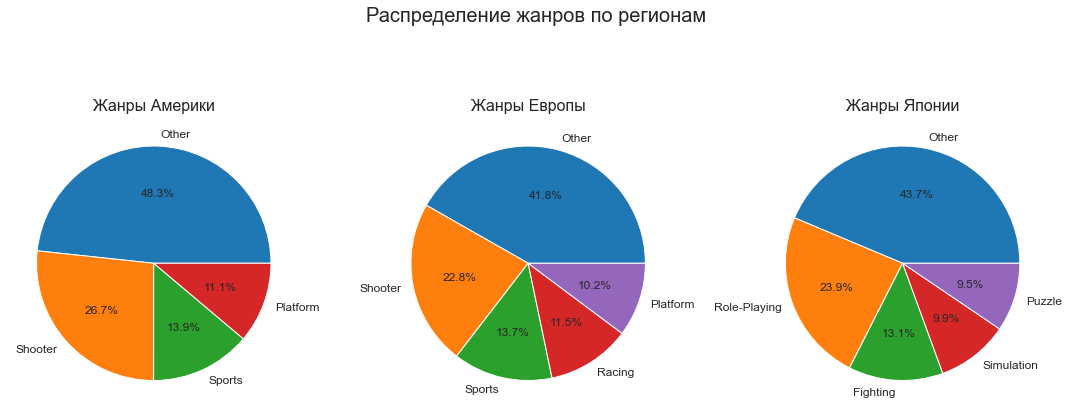

In [52]:
figure(figsize=(15, 7))
plt.suptitle("Распределение жанров по регионам", fontsize=20)


plt.subplot(1, 3, 1)
plt.pie(na_genres['ratio'], labels=na_genres['genre'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Жанры Америки', fontsize=16)

plt.subplot(1, 3, 2)
plt.pie(eu_genres['ratio'], labels=eu_genres['genre'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Жанры Европы', fontsize=16)

plt.subplot(1, 3, 3)
plt.pie(jp_genres['ratio'], labels=jp_genres['genre'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Жанры Японии', fontsize=16)

plt.tight_layout()

plt.show()

Касаемо жанров:
> - В Европе и Америке предпочтения одинаковые практически одинаковые. Лидируют шутеры и спортивные игры. 
> - В Японии предпочтение отдают РПГ и бойцовским играм. 
> - По всем регионам видим, что мелкие жанры, занимающие менее 10% каждый по одиночке, суммарно опережают все остальные жанры, в том числе лидеров по региону. 

### Зависимость продаж от рейтинга ESRB 

Также полезно будет узнать, зависят ли продажи от возрастного рейтинга игры. 

In [53]:
sales = ['na_sales', 'eu_sales', 'jp_sales' ]

for i in sales:
    rating = (
    games_act
    .groupby('rating')[i]
    .agg(['median', 'count']).reset_index()
    .sort_values('median', ascending=False)
)
    display(rating)
    

,rating,median,count
2,M,0.14,369
1,E10+,0.12,252
0,E,0.05,302
4,T,0.04,333
3,NA,0.00,977


,rating,median,count
2,M,0.13,369
1,E10+,0.10,252
0,E,0.06,302
4,T,0.04,333
3,NA,0.00,977


,rating,median,count
3,NA,0.02,977
4,T,0.01,333
0,E,0.00,302
1,E10+,0.00,252
2,M,0.00,369


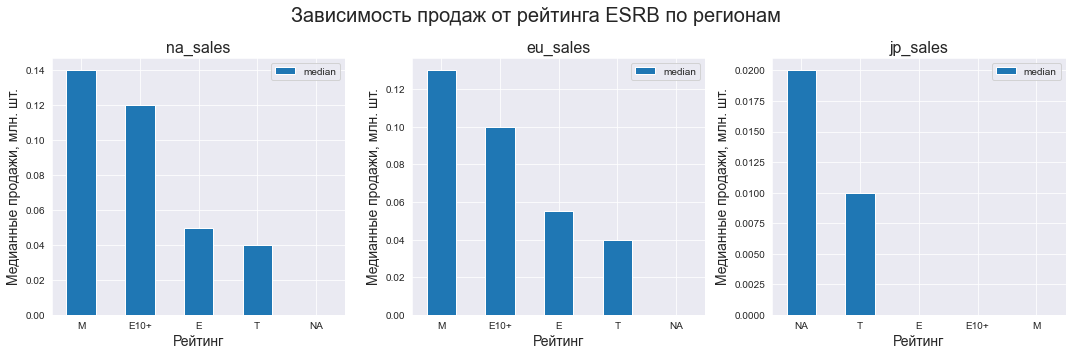

In [54]:

figure(figsize=(15, 5))
plt.suptitle("Зависимость продаж от рейтинга ESRB по регионам", fontsize=20)


for i, region in enumerate(sales):
    rating = (
    games_act
    .groupby('rating')[region]
    .agg(['median', 'count']).reset_index()
    .sort_values('median', ascending=False)
)
    ax=plt.subplot(1,3,(i+1))
    rating.plot(ax=ax, x='rating', y='median', kind='bar', rot=0)
    plt.title(region, fontsize=16)
    plt.xlabel('Рейтинг', fontsize=14)
    plt.ylabel('Медианные продажи, млн. шт.', fontsize=14)
    
plt.tight_layout()    
plt.show()

Что касается рейтингов ESRB:
> - В Америке и Европе распределение одинаковое. Лидеры - игры с рейтингом "Для взрослых" и "Для всех старше 10 лет". Игры без рейтингов почти не продаются. 
> - В Японии ситуация совершенно противоположная. Больше всего там продается игр без рейтингов: используемая в США система в Японии не применяется. Продажи игр с присвоенным рейтингом крайне низкие. 

## Проверка гипотез

По итогам работы нам нужно сделать выводы, которые помогут спланировать рекламные кампании на будущий год, сделать ставку на определенные платформы, жанры игр.  

Также полезно будет понимать поведение пользователей на разных платформах и в разных жанрах игр.  


Например, проверим, отличаются ли средние пользовательские рейтинги для платформ Xbox One и PC. Есть ли разница в поведении пользователей лидирующей и отстающей платформ. 


Выдвинем гипотезы:  
>H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
>H1: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [55]:
xone = games_act[games_act['platform']== 'XOne']['user_score'].dropna()
pc = games_act[games_act['platform']== 'PC']['user_score'].dropna()

In [56]:
print(xone.count())
pc.count()

182


155

Выборки практически идентичны по размеру. Проверим гипотезу о равенстве средних через t-тест. 

In [57]:
alpha = 0.05 

results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Среднее пользовательское "Xbox One" 6.521
Среднее пользовательское "PC" 6.270


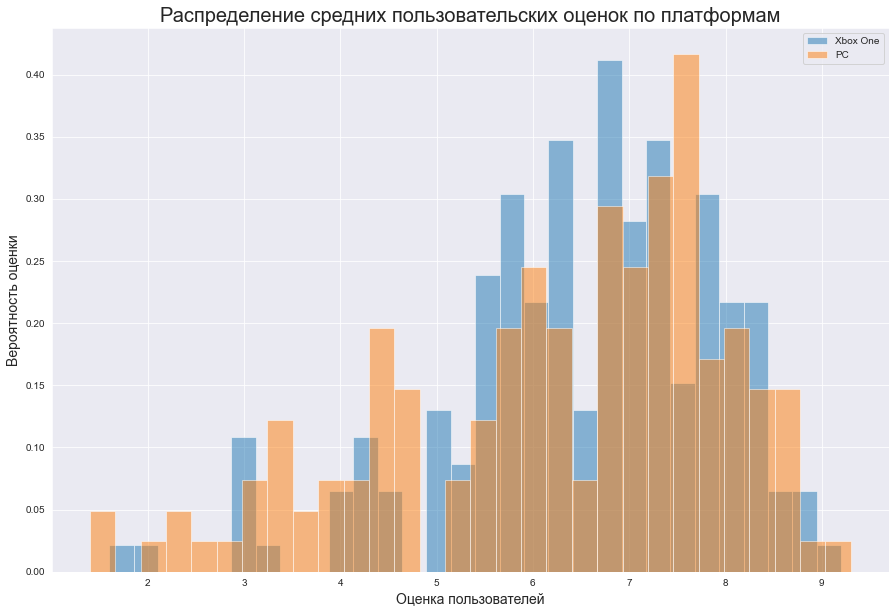

In [58]:
xone.plot(kind='hist', bins=30, label='Xbox One', legend=True, figsize=(15, 10), alpha=0.5, density=True)

pc.plot(kind='hist', bins=30, label='PC', legend=True, figsize=(15, 10), alpha=0.5, density=True)

plt.title('Распределение средних пользовательских оценок по платформам', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.ylabel('Вероятность оценки', fontsize=14)
plt.show;

print('Среднее пользовательское "Xbox One"', '{:.3f}'.format(xone.mean()))
print('Среднее пользовательское "PC"', '{:.3f}'.format(pc.mean()))

По результатам статистического анализа мы не можем отвергнуть нулевую гипотезу. Вероятность получить такую же или большую разницу в средних, при условии, что наша гипотеза верна, почти равна единице. 
Также для наглядности можем построить графики по нашим выборкам и посчитать средние пользовательские по ним.  
Видим, что и распределения, и подсчеты крайне близки. 

Также проверим, отличаются ли средние пользовательские рейтинги для различных жанров игр. Для сравнения возьмем Action и Sports. 

>H0: средние пользовательские рейтинги игр жанров Action и Sports одинаковые.  
>H1: средние пользовательские рейтинги игр жанров Action и Sports отличаются. 

In [59]:
action = games_act[games_act['genre']== 'Action']['user_score'].dropna()
sport = games_act[games_act['genre']== 'Sports']['user_score'].dropna()

In [60]:
print(action.count())
sport.count()

389


160

Данные выборки сильно отличаются по размеру. Для точности проверки это нужно учесть при проведении t-теста. 

In [61]:
alpha = 0.05 

results = st.ttest_ind(
    action, 
    sport,
    equal_var = False
    )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Среднее пользовательское "Action" 6.838
Среднее пользовательское "Sport" 5.238


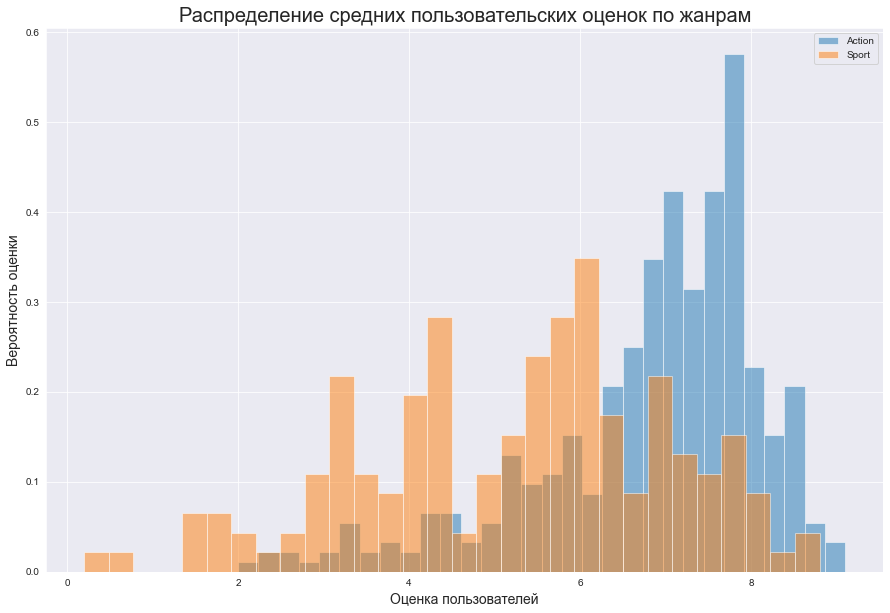

In [62]:

action.plot(kind='hist', bins=30, label='Action', legend=True, figsize=(15, 10), alpha=0.5, density=True)

sport.plot(kind='hist', bins=30, label='Sport', legend=True, figsize=(15, 10), alpha=0.5, density=True)

plt.title('Распределение средних пользовательских оценок по жанрам', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.ylabel('Вероятность оценки', fontsize=14)
plt.show;

print('Среднее пользовательское "Action"', '{:.3f}'.format(action.mean()))
print('Среднее пользовательское "Sport"', '{:.3f}'.format(sport.mean()))

В этом случае отвергаем нулевую гипотезу. По графикам и подсчетам также видим, что выборки сильно отличаются по значениям.

# Вывод

В ходе проекта проанализировали данные по продажам игр за период с 1985 года по 2016 (неполный).   

При обработке данных дополнительно посчитали общие продажи по играм, убрали неинформативные строки.  

**Перспективные платформы и жанры**  
Выяснили, что в актуальный период времени лидирующими платформами являются *PS4* и *XBox One*. *XBox One* является лидером по продажам игр в Северной Америке, в Европе лидирует *PS4*. При планировании рекламного бюджета стоит удалить наибольшее внимание именно играм для этих  двух платформ.  
Также по этим регионам совпадают наиболее популярные жанры игр:
> 1. шутеры;
> 1. спортивные.  


Японские пользователи предпочитают портативные платформы стационарным. Наиболее популятная платформа там - *3DS*, она занимает почти половину всех продаж. 
Также есть отличия от остального мира по предпочитаемым жанрам.  
Лидеры японского рынка:  
> 1. РПГ;  
> 1. бои;
> 1. симуляторы.  


**Рейтинг**  
При планировании рекламной кампании следует обращать внимание на оценки игр от критиков - они сильно коррелируют с продажами. Про оценки от пользователей такого сказать нельзя, зависимости продаж от оценки пользователей не выявили. 

Что касается рейтинга по возрастным группам, то его стоит брать во внимание только в Америке и Европе: там лидируют игры с рейтингами `M` и `E10+`. В Японии эта система рейтингов не используется, и продаж у игр с каким-либо возрастным рейтингом от ESRB там тоже практически нет.   


Также проверили гипотезы о равенстве пользовательских рейтингов для различных платформ и жанров игр.  
Установили, что средний рейтинг от пользователей *XBox One* может совпадать с рейтингом от пользователей *ПК*. То есть привязки рейтинга к платформе (в данной паре) нет.  
Однако если взять различные жанры, например Экшен и Спорт, то тут равенства средних рейтингов скорее не будет. 

